In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Show all columns in pandas
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('../data/measurements.csv')
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [4]:
data2 = pd.read_excel('../data/measurements2.xlsx')
data2

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


Both files look the same.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


The columns 'distance', 'consume', 'temp_inside' have values with data type object and need to be converted to floats: 

The error we're encountering seems to stem from the format. We'll replace ',' with '.'

In [6]:
data['distance'] = data['distance'].str.replace(',', '.')
data['consume'] = data['consume'].str.replace(',', '.')
data['temp_inside'] = data['temp_inside'].str.replace(',', '.')

In [7]:
data['distance'] = pd.to_numeric(data['distance'], errors='coerce')
data['consume'] = pd.to_numeric(data['consume'], errors='coerce')
data['temp_inside'] = pd.to_numeric(data['temp_inside'], errors='coerce')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     object 
 11  refill gas     13 non-null     object 
dtypes: float64(3), int64(5), object(4)
memory usage: 36.5+ KB


In [9]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
categoric_data = data.select_dtypes(include=['object'])

In [10]:
numeric_data.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000


We can see the data is differently distributed in the different columns and also the ranges are different. 

Next we check the unique values of the categorical columns: 

In [11]:
categoric_data.columns

Index(['specials', 'gas_type', 'refill liters', 'refill gas'], dtype='object')

In [12]:
categoric_data['specials'].value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

We can see there are values, which are the same, but are spelled differently, we correct that: 

In [13]:
value_mapping = {
    'ac': 'AC',
    'AC Sun': 'AC sun',
    'sun ac': 'AC sun',
    'ac rain': 'AC rain',
}

data['specials'] = categoric_data['specials'].replace(value_mapping)

In [14]:
categoric_data['gas_type'].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

Checking for missing values: 

In [15]:
missing_values_df = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
missing_values_df = missing_values_df.reset_index()
missing_values_df.columns = ['column_name', 'percentage_of_missing_values']
display(missing_values_df)

,column_name,percentage_of_missing_values
0,distance,0.00
1,consume,0.00
2,speed,0.00
3,temp_inside,3.09
4,temp_outside,0.00
5,specials,76.03
6,gas_type,0.00
7,AC,0.00
8,rain,0.00
9,sun,0.00


Columns 10 and 11 contain too many missing values and we`re going to drop them.

In [16]:
data.drop(columns=['refill liters', 'refill gas'], inplace=True)

In [17]:
data['specials'].value_counts()

rain                  32
sun                   27
AC                    14
AC rain               10
AC sun                 5
snow                   3
AC snow                1
half rain half sun     1
Name: specials, dtype: int64

Most of the data from this column has already been coded in the columns 'AC' 'rain' 'sun' therefor we can drop it. 

In [18]:
data.drop(columns='specials', inplace=True)

I am not sure if we are going to need this column since we already have the most important info in other columns. 

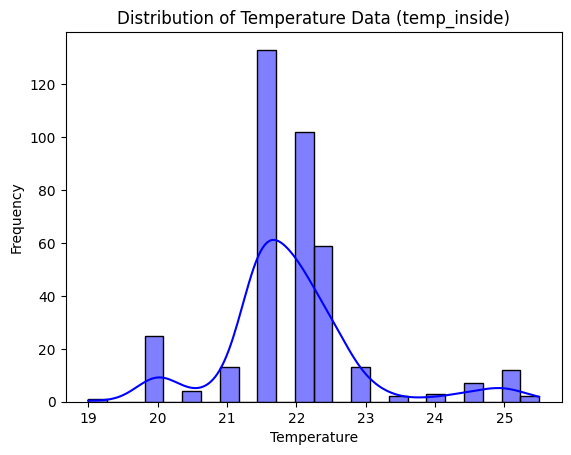

In [19]:
sns.histplot(data['temp_inside'], kde=True, color='blue')
plt.title('Distribution of Temperature Data (temp_inside)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

We'll fill the missing values in the column temp_inside with the mean 21.92, rounded 22.00 because:
- we have continious data
- we have ordinal data (temperature)
- the range of the data is not very big
- std of 1 indicates a tight distribution
- we can see that we don`t have any major outliers

In [20]:
data['temp_inside'].fillna(22.00, inplace=True)

Now we check for duplicates:

In [21]:
duplicate_rows = data[data.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [22]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
categoric_data = data.select_dtypes(include=['object', 'int64'])

In [23]:
categoric_data.drop(columns=['temp_outside', 'speed'], inplace=True)

We check the distribution of the categoric data:

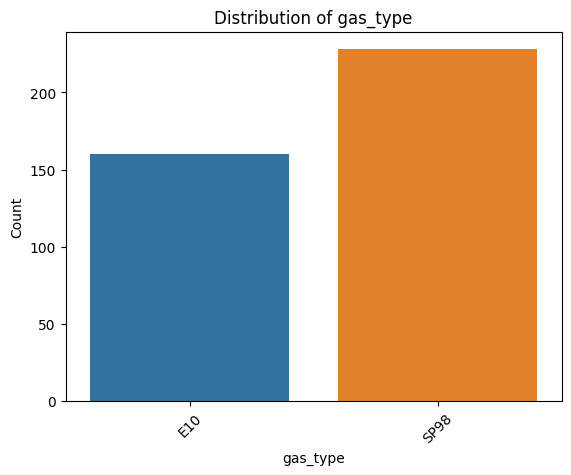

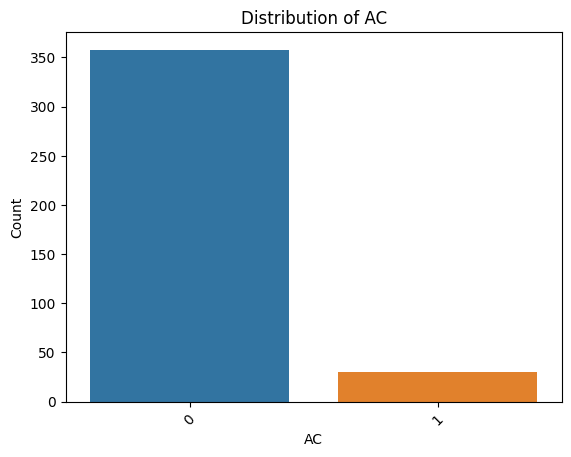

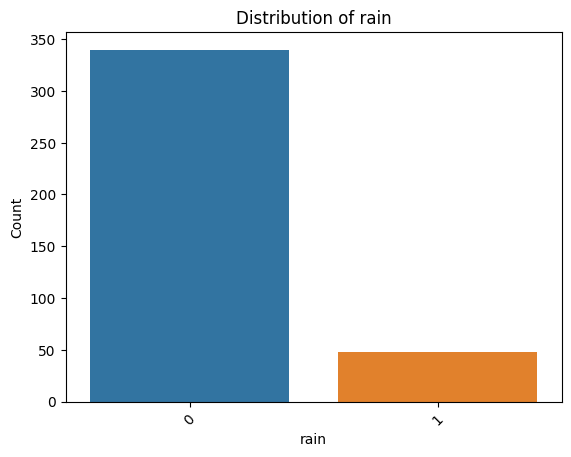

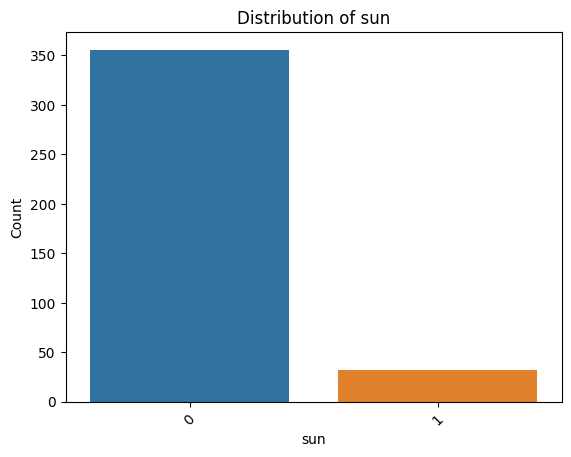

In [24]:
for column in categoric_data.columns:
    sns.countplot(x=column, data=categoric_data)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
    plt.show()

We can see that there is a significant data imbalance in the columns 'AC', 'rain', 'sun', in the 'fuel' column the imbalance is low. 

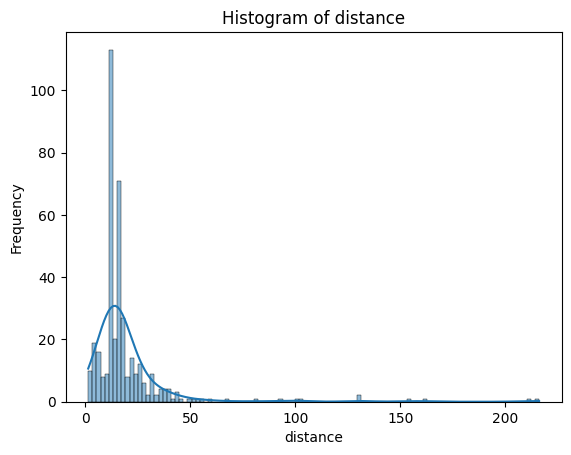

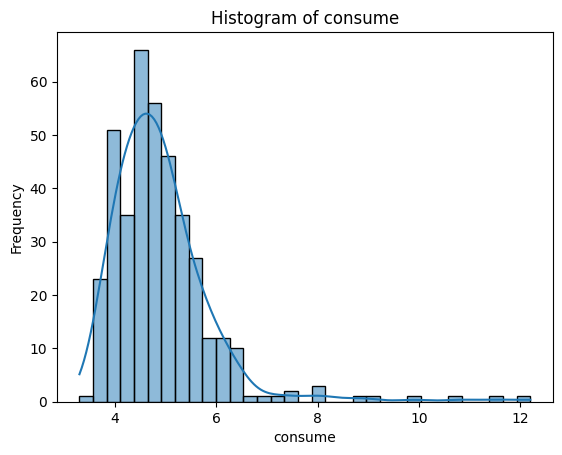

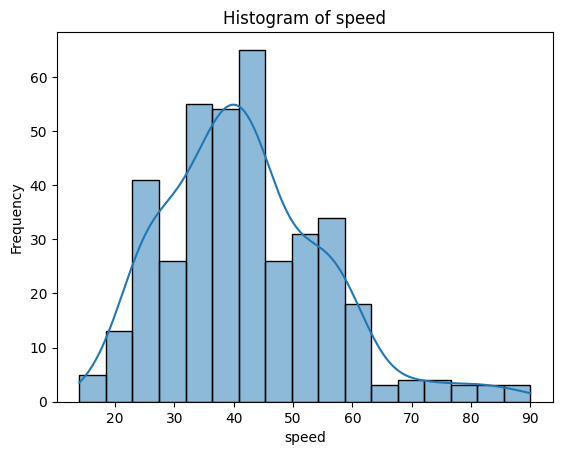

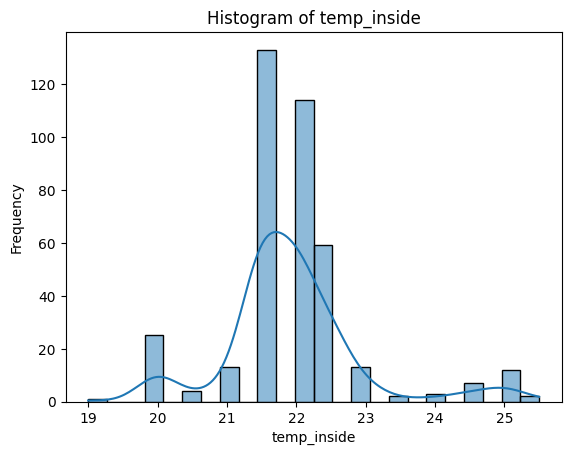

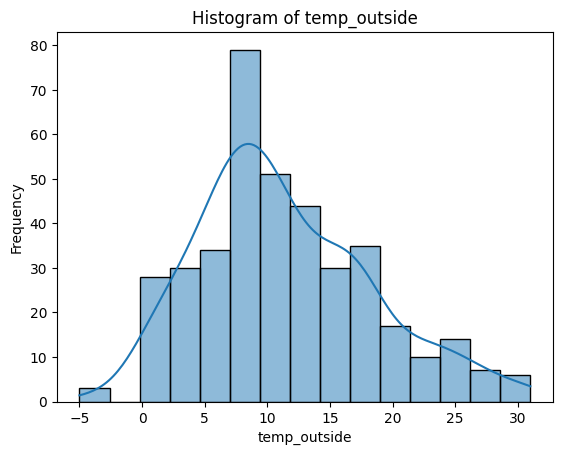

In [25]:
exclude_columns = ['AC', 'sun', 'rain']

for column in numeric_data.columns:
    if column not in exclude_columns:
        sns.histplot(numeric_data[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

We see that columns 'distance' and 'consume' are right skewed, which means we`re going to have to scale before modelling. 

But first we check the correlation matrix for colinearity between features: 

Before we do this, we encode the gas_type column:

In [26]:
data_encoded = pd.get_dummies(data, columns=['gas_type'])

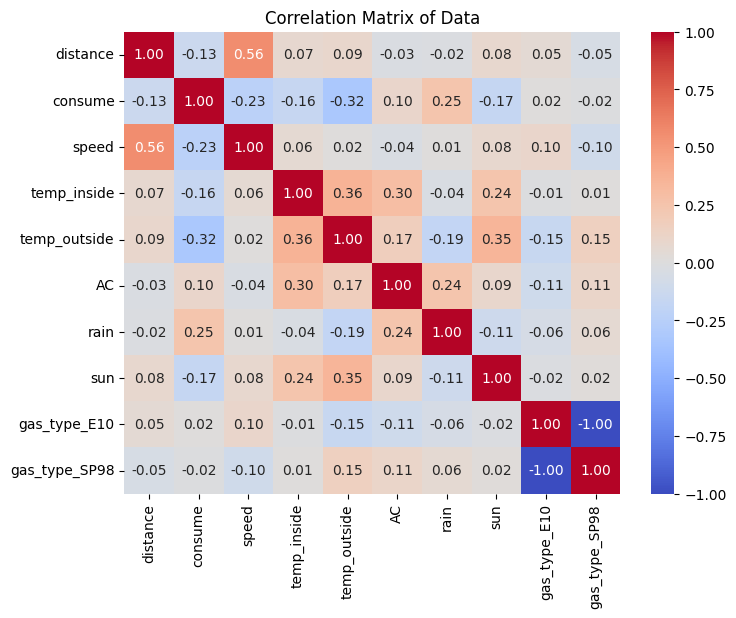

In [27]:
correlation_matrix = data_encoded.corr()

plt.figure(figsize=(8, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Data")
plt.show()

We don't see any colinearity except between distance and speed. As long as it`s lower than 0.8 we do nothing and proceed. 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [29]:
X = data_encoded.drop(columns='consume')

In [30]:
y = data_encoded['consume']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()

In [32]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)

In [37]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.8219075821875492


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

print(mae, rmse, r_squared)

0.6598027559858758 0.9065911880156068 0.09412310938686286


Overall, these metrics suggest that the model's predictive performance is not very strong. The MAE and RMSE indicate that the model's predictions have a considerable amount of error compared to the actual values, and the low R-squared value suggests that the model explains only a small portion of the variance in the target variable.


Plot actual vs. predicted values

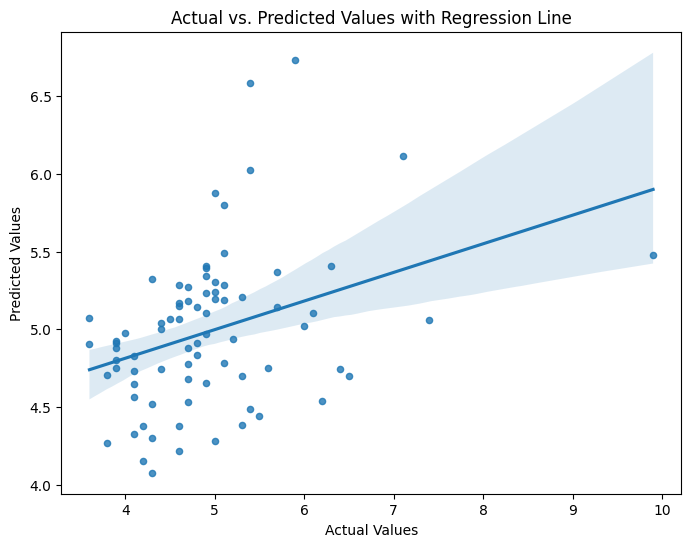

In [39]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 20}) 
plt.title('Actual vs. Predicted Values with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

With more time and more data we can check other models to predict the consumption. 